In [2]:
pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


ModuleNotFoundError: No module named 'ucimlrepo'

Generating histograms for numerical features...


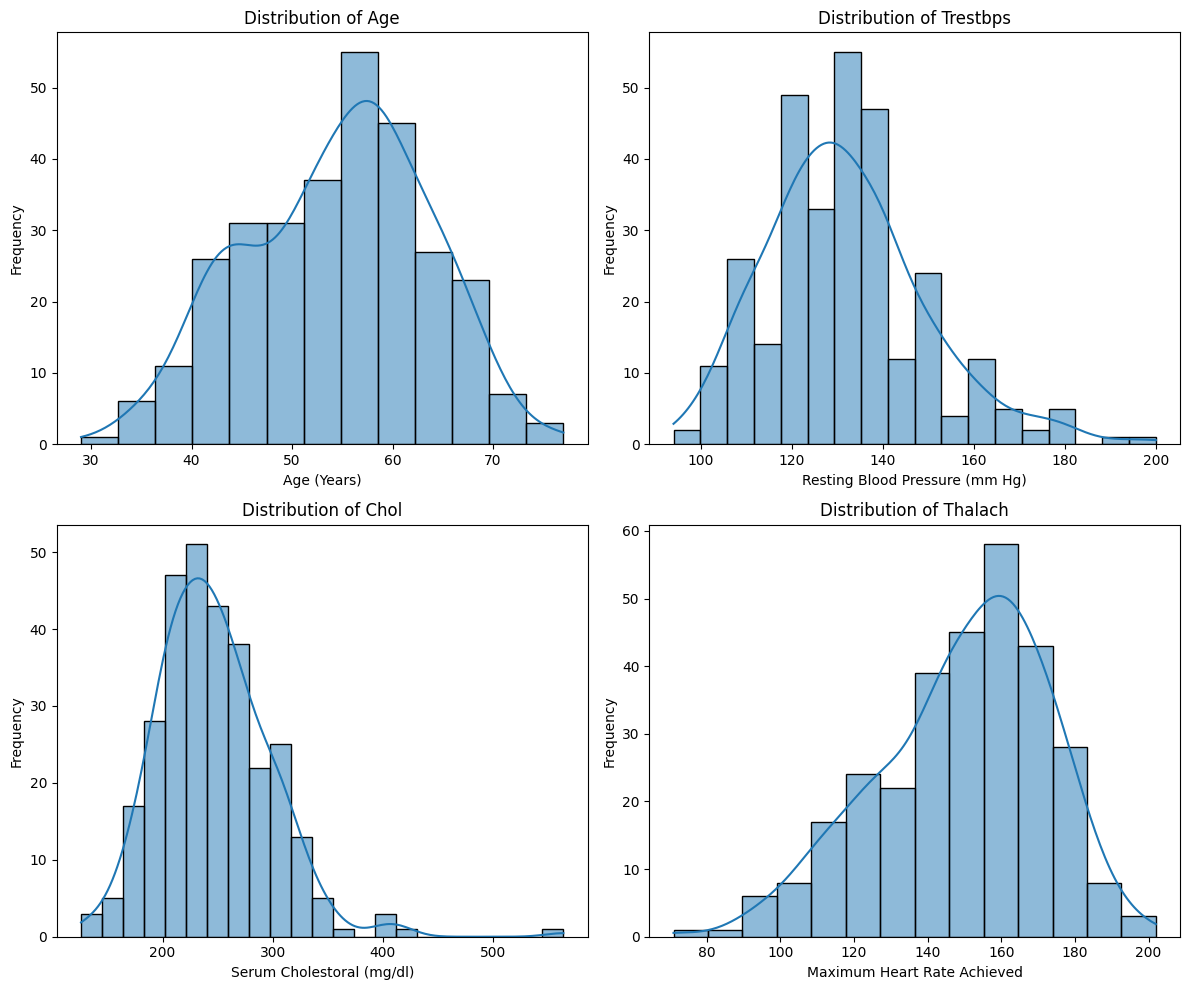


Generating bar charts for categorical features...


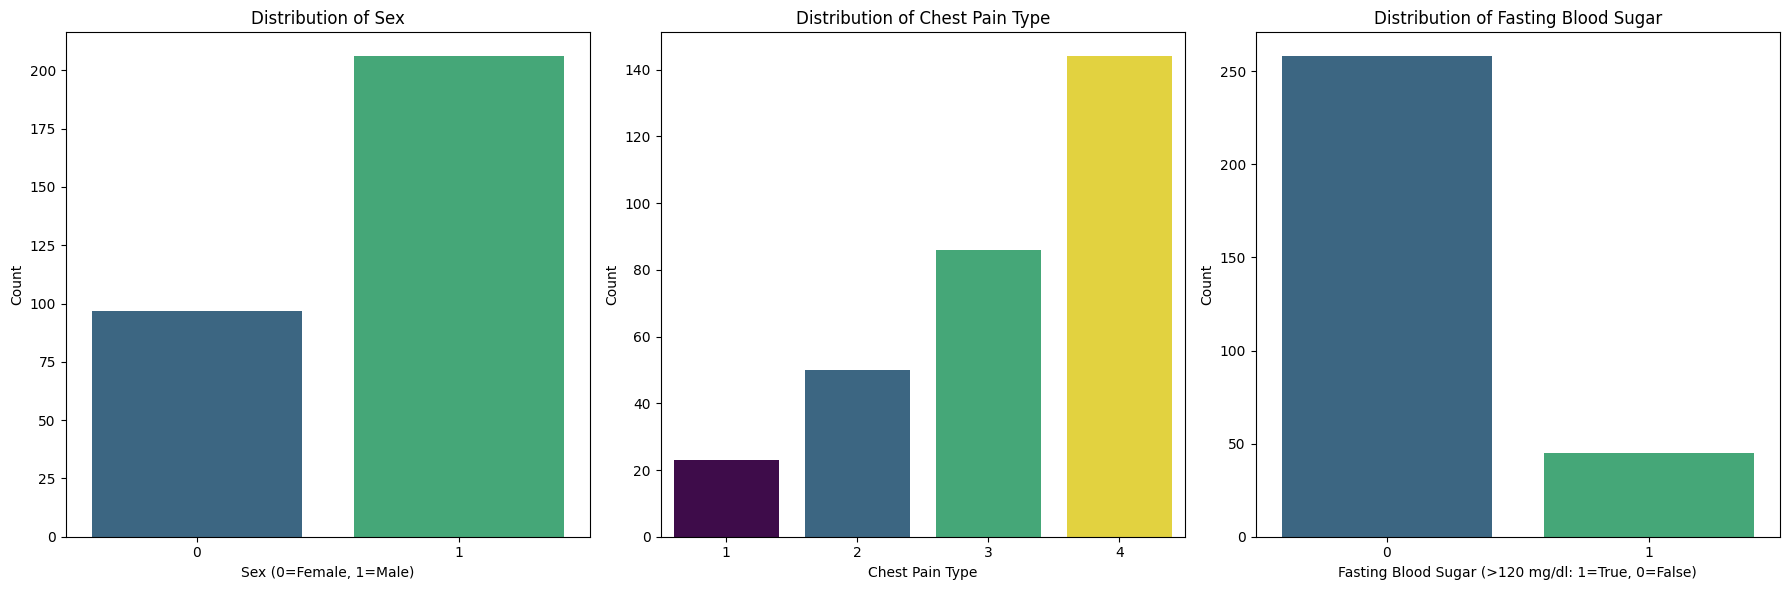


Generating box plots for numerical features vs. target...


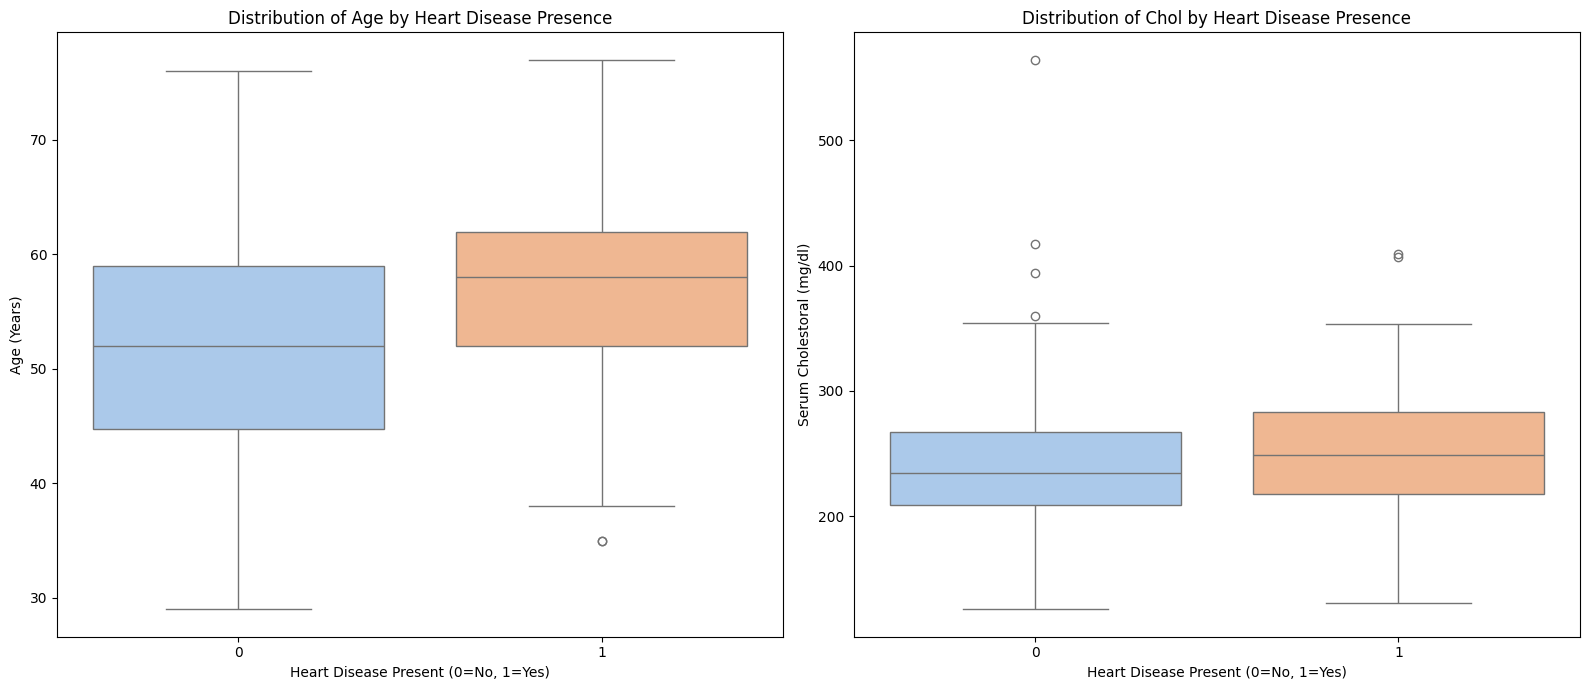

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Histograms for numerical features ---
print("Generating histograms for numerical features...")
numerical_features = ['age', 'trestbps', 'chol', 'thalach']

fig_hist, axes_hist = plt.subplots(2, 2, figsize=(12, 10))
axes_hist = axes_hist.flatten()

x_axis_labels_hist = {
    'age': 'Age (Years)',
    'trestbps': 'Resting Blood Pressure (mm Hg)',
    'chol': 'Serum Cholestoral (mg/dl)',
    'thalach': 'Maximum Heart Rate Achieved'
}

for i, feature in enumerate(numerical_features):
    sns.histplot(X[feature], kde=True, ax=axes_hist[i])
    axes_hist[i].set_title(f'Distribution of {feature.replace("_", " ").title()}')
    axes_hist[i].set_xlabel(x_axis_labels_hist.get(feature, feature.replace("_", " ").title()))
    axes_hist[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- Bar charts for categorical features ---
print("\nGenerating bar charts for categorical features...")
categorical_features = ['sex', 'cp', 'fbs']

fig_bar, axes_bar = plt.subplots(1, 3, figsize=(18, 6))

feature_titles_bar = {
    'sex': 'Distribution of Sex',
    'cp': 'Distribution of Chest Pain Type',
    'fbs': 'Distribution of Fasting Blood Sugar'
}
x_axis_labels_bar = {
    'sex': 'Sex (0=Female, 1=Male)',
    'cp': 'Chest Pain Type',
    'fbs': 'Fasting Blood Sugar (>120 mg/dl: 1=True, 0=False)'
}

for i, feature in enumerate(categorical_features):
    sns.countplot(x=X[feature], hue=X[feature], ax=axes_bar[i], palette='viridis', legend=False)
    axes_bar[i].set_title(feature_titles_bar[feature])
    axes_bar[i].set_xlabel(x_axis_labels_bar[feature])
    axes_bar[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# --- Box plots for numerical features vs. target ---
print("\nGenerating box plots for numerical features vs. target...")
# Ensure y_binary and df_combined are available or recreated
y_binary = y['num'].apply(lambda x: 1 if x > 0 else 0)
df_combined = pd.concat([X, y_binary.rename('heart_disease_present')], axis=1)

numerical_features_for_boxplot = ['age', 'chol']

fig_box, axes_box = plt.subplots(1, 2, figsize=(16, 7))

x_axis_label_box = 'Heart Disease Present (0=No, 1=Yes)'
y_axis_labels_box = {
    'age': 'Age (Years)',
    'chol': 'Serum Cholestoral (mg/dl)'
}

for i, feature in enumerate(numerical_features_for_boxplot):
    sns.boxplot(x='heart_disease_present', y=feature, data=df_combined, ax=axes_box[i], palette='pastel', hue='heart_disease_present', legend=False)
    axes_box[i].set_title(f'Distribution of {feature.replace("_", " ").title()} by Heart Disease Presence')
    axes_box[i].set_xlabel(x_axis_label_box)
    axes_box[i].set_ylabel(y_axis_labels_box.get(feature, feature.replace("_", " ").title()))

plt.tight_layout()
plt.show()

# Task
Perform exploratory data analysis on the 'heart_disease' dataset (ID 45) by loading the dataset, generating histograms for numerical features ('age', 'trestbps', 'chol', 'thalach'), creating bar charts for categorical features ('sex', 'cp', 'fbs'), producing box plots to illustrate relationships between a selected numerical feature (e.g., 'age' or 'chol') and the target variable, and finally summarizing the key insights and patterns observed from these visualizations.

## Load Dataset

### Subtask:
Re-import the `ucimlrepo` library and fetch the 'heart_disease' dataset (id=45) to ensure that the features (X) and targets (y) are correctly loaded into pandas DataFrames, addressing the previous module not found error.


**Reasoning**:
The previous code block failed with a `ModuleNotFoundError` despite `ucimlrepo` being installed. I will re-import the `fetch_ucirepo` function, fetch the heart disease dataset, extract features and targets, and display metadata and variable information to verify successful loading.



In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print("Dataset Metadata:")
print(heart_disease.metadata)

# variable information
print("\nVariable Information:")
print(heart_disease.variables)

Dataset Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi

## Numerical Feature Histograms

### Subtask:
Generate histograms for key numerical features such as 'age', 'trestbps' (resting blood pressure), 'chol' (cholesterol), and 'thalach' (maximum heart rate achieved) from the 'X' DataFrame to visualize their distributions. Ensure appropriate titles and axis labels are provided, along with legends if necessary.


**Reasoning**:
I need to import the necessary visualization libraries, `matplotlib.pyplot` and `seaborn`, to create histograms. These libraries are standard for plotting in Python and will allow me to generate the required visualizations effectively.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported successfully.")

Matplotlib and Seaborn imported successfully.


**Reasoning**:
I need to generate histograms for the specified numerical features ('age', 'trestbps', 'chol', 'thalach') using `seaborn.histplot` and `matplotlib.pyplot` to visualize their distributions, as outlined in the subtask instructions.



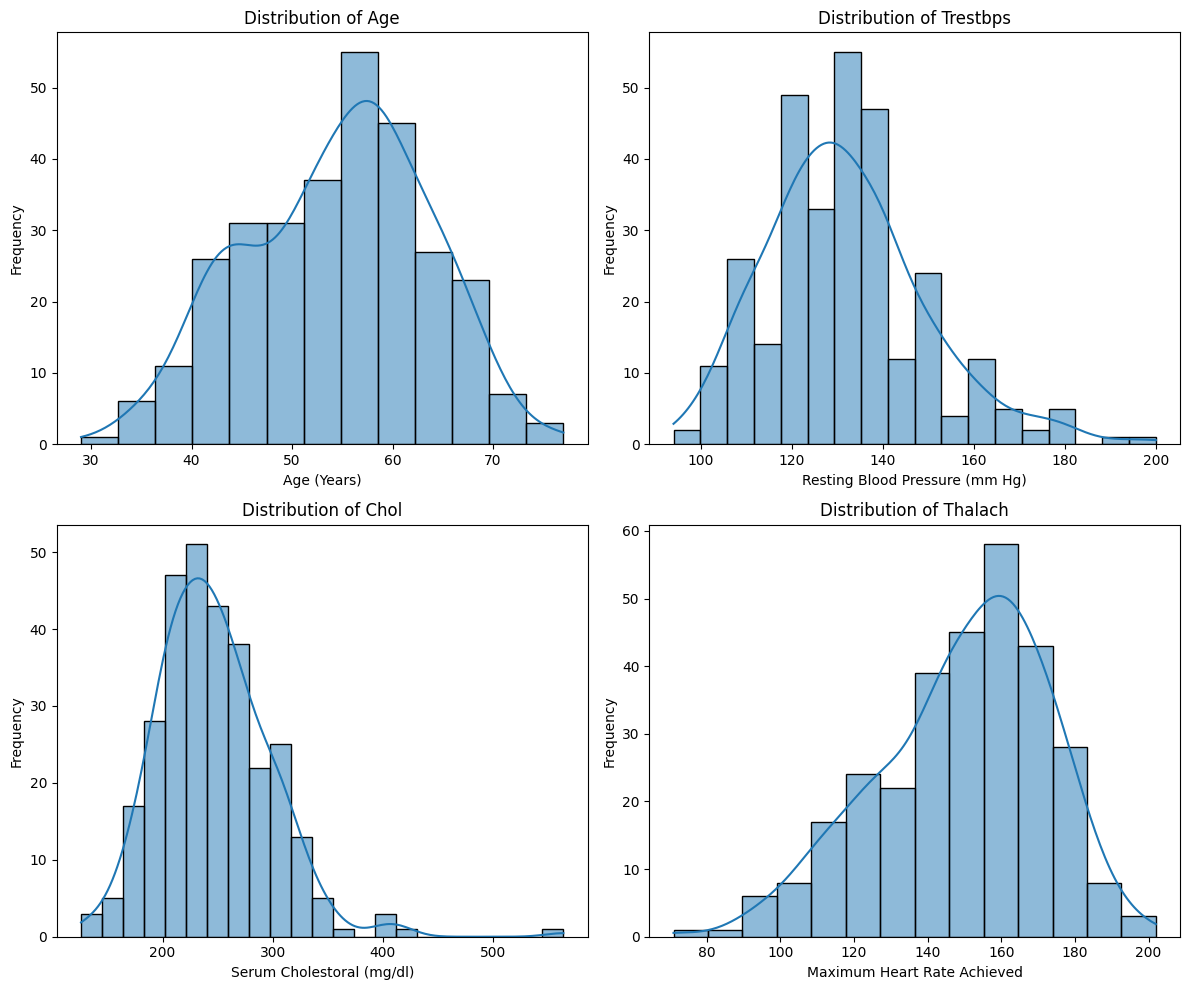

In [5]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach']

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

# Define axis labels for better readability
x_axis_labels = {
    'age': 'Age (Years)',
    'trestbps': 'Resting Blood Pressure (mm Hg)',
    'chol': 'Serum Cholestoral (mg/dl)',
    'thalach': 'Maximum Heart Rate Achieved'
}

# Generate histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(X[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()}')
    axes[i].set_xlabel(x_axis_labels.get(feature, feature.replace("_", " ").title()))
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()


## Categorical Feature Bar Charts

### Subtask:
Create bar charts for significant categorical features like 'sex', 'cp' (chest pain type), and 'fbs' (fasting blood sugar) from the 'X' DataFrame to display the frequency or count of each category. Ensure appropriate titles and axis labels are provided.


**Reasoning**:
I need to generate bar charts for the specified categorical features ('sex', 'cp', 'fbs') using `seaborn.countplot` and `matplotlib.pyplot` to visualize their distributions, as outlined in the subtask instructions.



/tmp/ipython-input-1776800512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], ax=axes[i], palette='viridis')
/tmp/ipython-input-1776800512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], ax=axes[i], palette='viridis')
/tmp/ipython-input-1776800512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], ax=axes[i], palette='viridis')


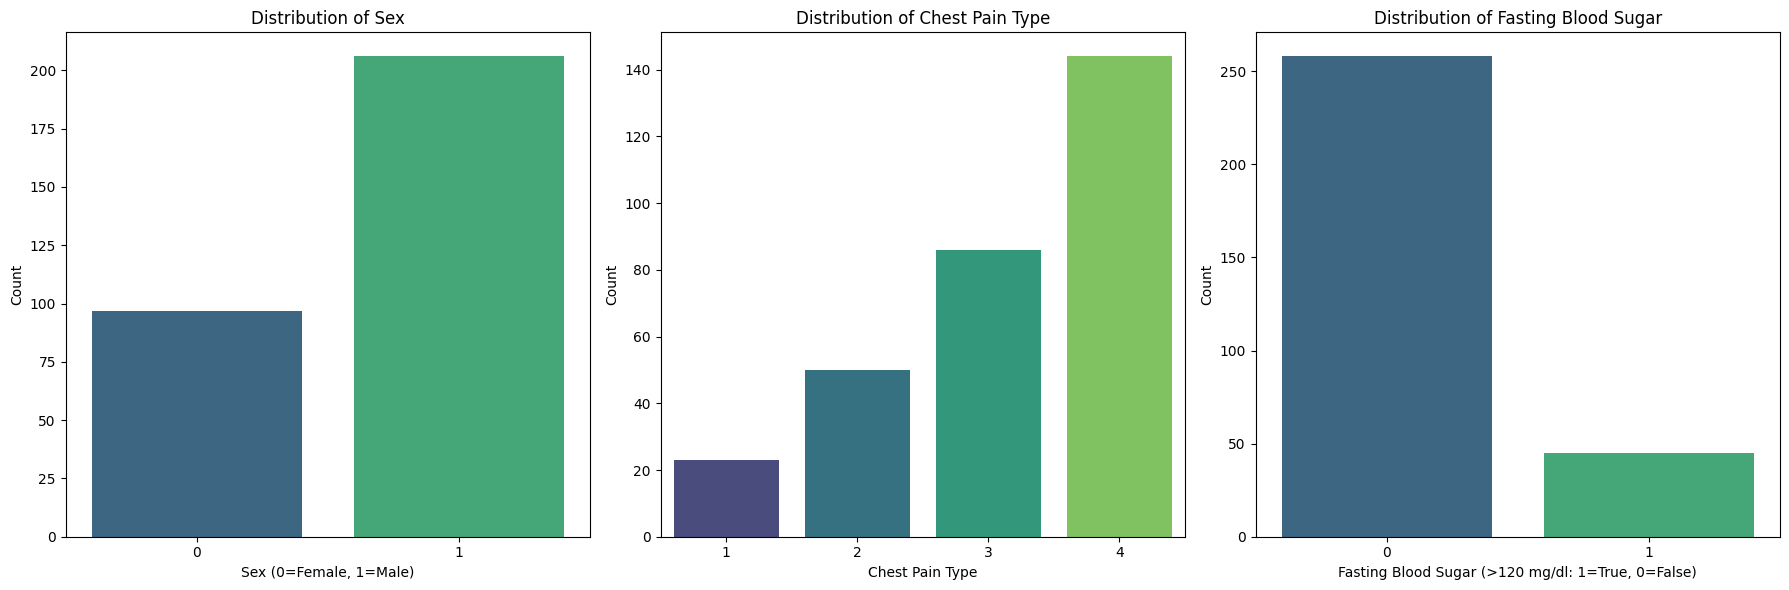

In [6]:
categorical_features = ['sex', 'cp', 'fbs']

# Create a figure and a set of subplots for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns

# Define axis labels for better readability and titles
feature_titles = {
    'sex': 'Distribution of Sex',
    'cp': 'Distribution of Chest Pain Type',
    'fbs': 'Distribution of Fasting Blood Sugar'
}
x_axis_labels = {
    'sex': 'Sex (0=Female, 1=Male)',
    'cp': 'Chest Pain Type',
    'fbs': 'Fasting Blood Sugar (>120 mg/dl: 1=True, 0=False)'
}

# Generate bar charts for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=X[feature], ax=axes[i], palette='viridis')
    axes[i].set_title(feature_titles[feature])
    axes[i].set_xlabel(x_axis_labels[feature])
    axes[i].set_ylabel('Count')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages from Seaborn regarding the usage of `palette` without `hue` in `sns.countplot`. To resolve this, I will explicitly set `hue` to the feature itself and `legend=False` as recommended by the warning, which will retain the desired coloring and suppress the warnings.



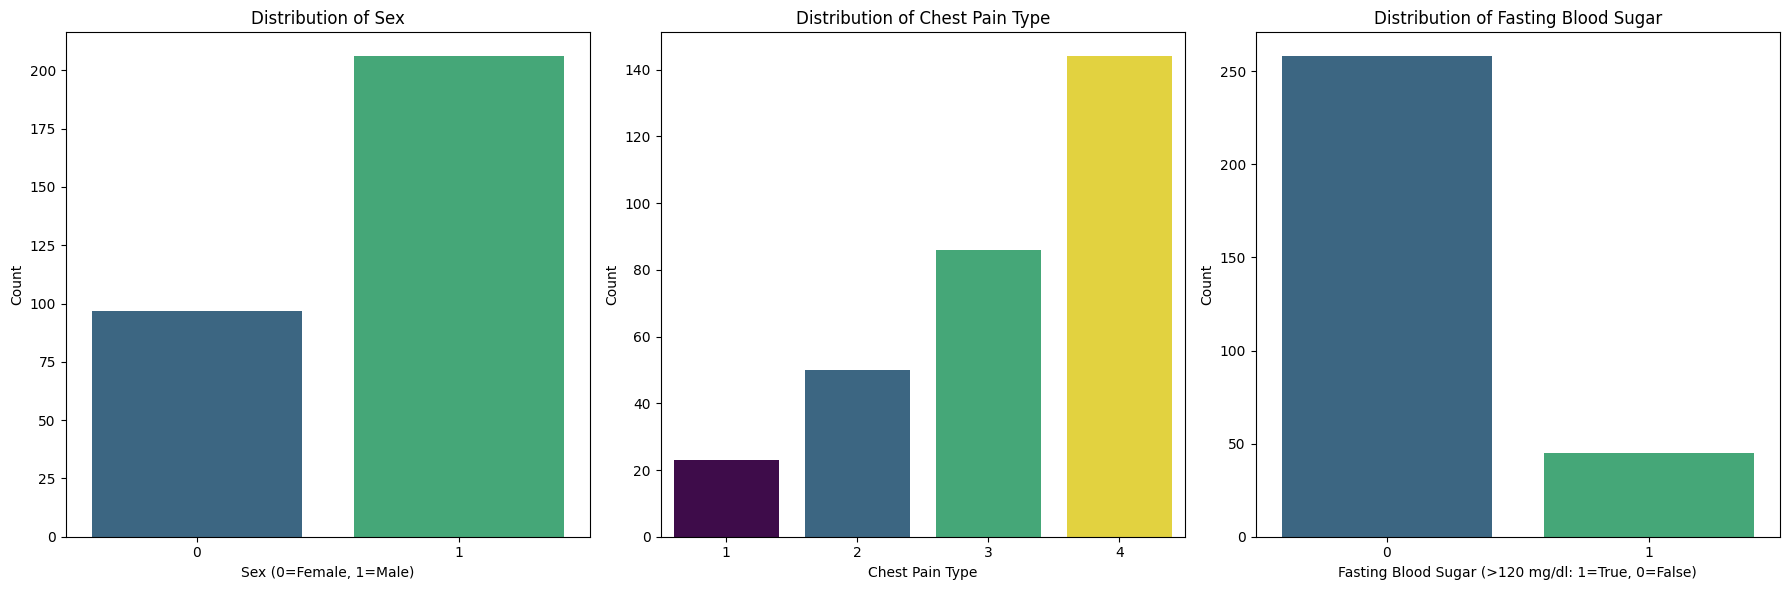

In [7]:
categorical_features = ['sex', 'cp', 'fbs']

# Create a figure and a set of subplots for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns

# Define axis labels for better readability and titles
feature_titles = {
    'sex': 'Distribution of Sex',
    'cp': 'Distribution of Chest Pain Type',
    'fbs': 'Distribution of Fasting Blood Sugar'
}
x_axis_labels = {
    'sex': 'Sex (0=Female, 1=Male)',
    'cp': 'Chest Pain Type',
    'fbs': 'Fasting Blood Sugar (>120 mg/dl: 1=True, 0=False)'
}

# Generate bar charts for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=X[feature], hue=X[feature], ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(feature_titles[feature])
    axes[i].set_xlabel(x_axis_labels[feature])
    axes[i].set_ylabel('Count')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()

## Box Plots for Numerical Feature vs. Target

### Subtask:
Create box plots to visualize the relationship between a selected numerical feature (e.g., 'age' or 'chol') and the target variable 'num' from the 'y' DataFrame. The target variable 'num' indicates the presence of heart disease (0 for no presence, 1-4 for presence). For clarity, we will simplify the target to a binary classification: 0 (no heart disease) and 1 (heart disease presence). Ensure appropriate titles and axis labels are provided.


## Box Plots for Numerical Feature vs. Target

### Subtask:
Create box plots to visualize the relationship between a selected numerical feature (e.g., 'age' or 'chol') and the target variable 'num' from the 'y' DataFrame. The target variable 'num' indicates the presence of heart disease (0 for no presence, 1-4 for presence). For clarity, we will simplify the target to a binary classification: 0 (no heart disease) and 1 (heart disease presence). Ensure appropriate titles and axis labels are provided.


**Reasoning**:
The subtask requires visualizing the relationship between numerical features and a binary target variable. Currently, the target variable 'num' has values from 0 to 4. I need to transform 'num' into a binary variable (0 for no heart disease, 1 for heart disease presence) and combine it with the features DataFrame 'X' for plotting.



In [8]:
import pandas as pd

# Create a binary target variable from 'num'
# 0 indicates no heart disease, 1 indicates presence of heart disease
y_binary = y['num'].apply(lambda x: 1 if x > 0 else 0)

# Combine features (X) and the new binary target variable (y_binary) into a single DataFrame
df_combined = pd.concat([X, y_binary.rename('heart_disease_present')], axis=1)

print("Combined DataFrame with binarized target created successfully. First 5 rows:")
print(df_combined.head())

Combined DataFrame with binarized target created successfully. First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  heart_disease_present  
0  0.0   6.0                      0  
1  3.0   3.0                      1  
2  2.0   7.0                      1  
3  0.0   3.0                      0  
4  0.0   3.0                      0  


**Reasoning**:
The previous step successfully created a combined DataFrame with a binarized target variable. Now, I need to create box plots to visualize the relationship between selected numerical features ('age' and 'chol') and the new binary target variable 'heart_disease_present', as per the subtask instructions.



/tmp/ipython-input-3270542801.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='heart_disease_present', y=feature, data=df_combined, ax=axes[i], palette='pastel')
/tmp/ipython-input-3270542801.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='heart_disease_present', y=feature, data=df_combined, ax=axes[i], palette='pastel')


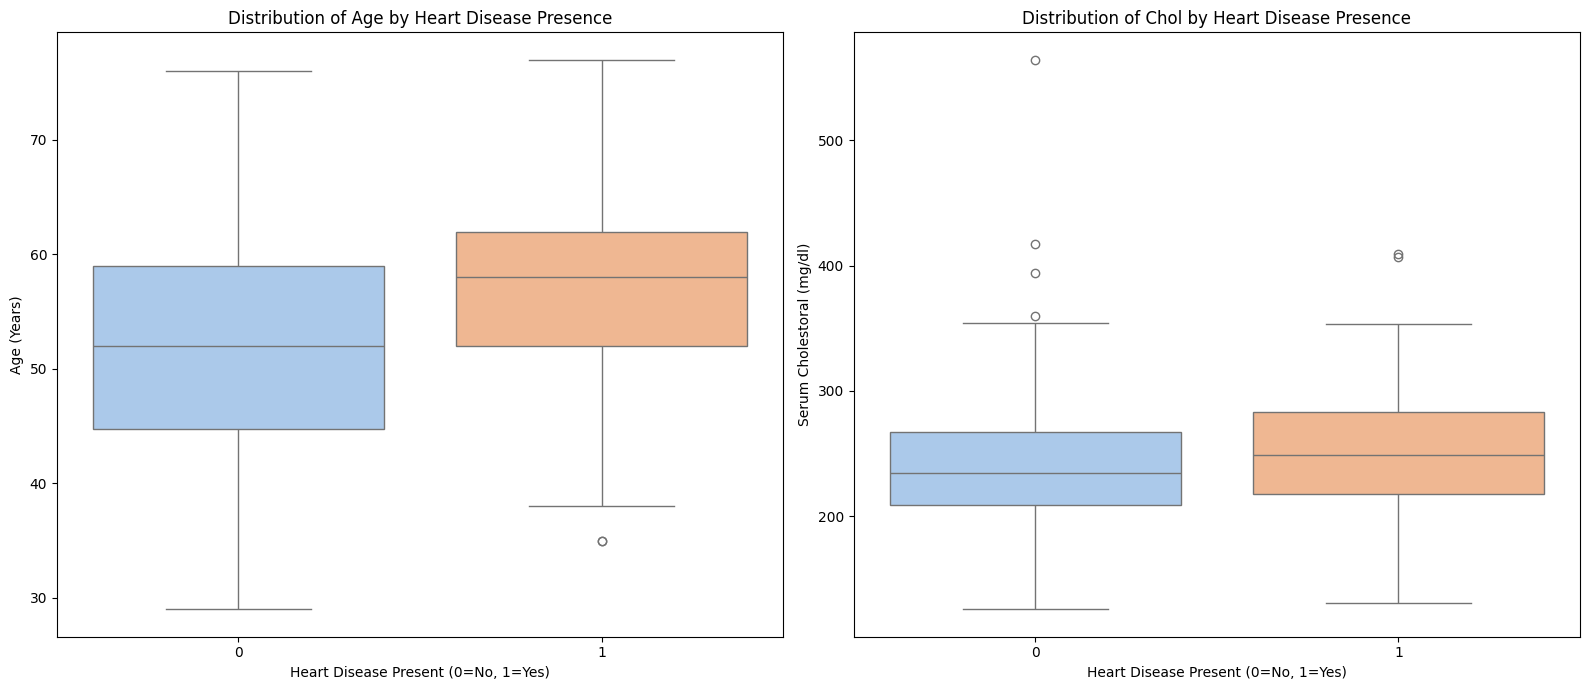

In [9]:
numerical_features_for_boxplot = ['age', 'chol'] # Select two numerical features for box plots

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # 1 row, 2 columns for two box plots

# Define axis labels for better readability
x_axis_label = 'Heart Disease Present (0=No, 1=Yes)'
y_axis_labels = {
    'age': 'Age (Years)',
    'chol': 'Serum Cholestoral (mg/dl)'
}

# Generate box plots for each selected numerical feature against the binary target
for i, feature in enumerate(numerical_features_for_boxplot):
    sns.boxplot(x='heart_disease_present', y=feature, data=df_combined, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()} by Heart Disease Presence')
    axes[i].set_xlabel(x_axis_label)
    axes[i].set_ylabel(y_axis_labels.get(feature, feature.replace("_", " ").title()))

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()


**Reasoning**:
The previous code generated `FutureWarning` messages from Seaborn regarding the usage of `palette` without `hue` in `sns.boxplot`. To resolve this, I will explicitly set `hue` to the `x` variable and `legend=False` as recommended by the warning, which will retain the desired coloring and suppress the warnings.



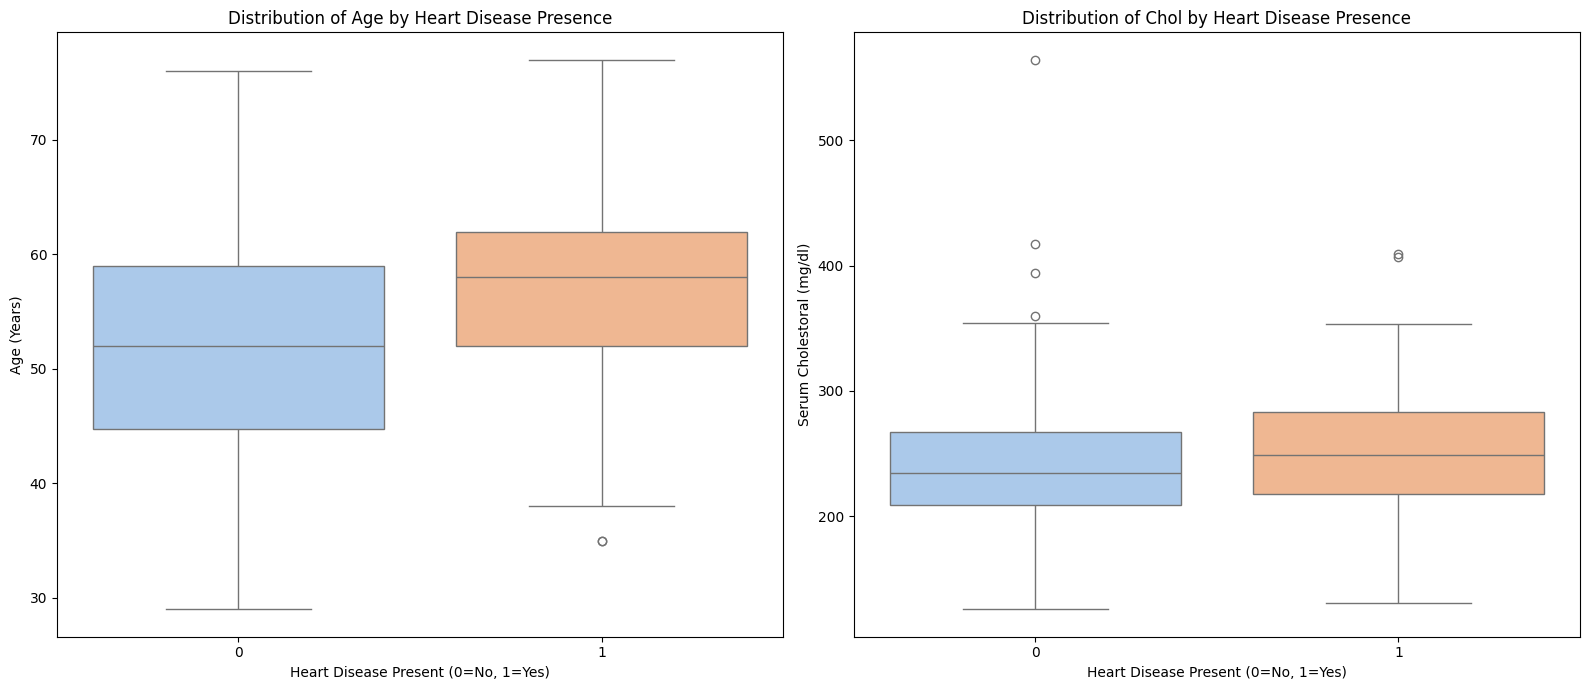

In [10]:
numerical_features_for_boxplot = ['age', 'chol'] # Select two numerical features for box plots

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # 1 row, 2 columns for two box plots

# Define axis labels for better readability
x_axis_label = 'Heart Disease Present (0=No, 1=Yes)'
y_axis_labels = {
    'age': 'Age (Years)',
    'chol': 'Serum Cholestoral (mg/dl)'
}

# Generate box plots for each selected numerical feature against the binary target
for i, feature in enumerate(numerical_features_for_boxplot):
    sns.boxplot(x='heart_disease_present', y=feature, data=df_combined, ax=axes[i], palette='pastel', hue='heart_disease_present', legend=False)
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()} by Heart Disease Presence')
    axes[i].set_xlabel(x_axis_label)
    axes[i].set_ylabel(y_axis_labels.get(feature, feature.replace("_", " ").title()))

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()

## Final Task

### Subtask:
Summarize the key insights and patterns observed from the generated histograms and graphs, explaining what these visualizations tell us about the heart disease dataset.


## Summary:

### Data Analysis Key Findings

*   **Age Distribution:** The distribution of age is roughly centered around 58-59 years, with a spread from the late 20s to over 70 years, suggesting a broad age range among the individuals in the dataset.
*   **Resting Blood Pressure (trestbps) Distribution:** Resting blood pressure mostly falls between 120-140 mmHg, indicating that a significant portion of the population has normal or slightly elevated blood pressure.
*   **Cholesterol (chol) Distribution:** Serum cholesterol levels are largely concentrated between 200-250 mg/dl, which could be a point of interest for heart disease risk.
*   **Maximum Heart Rate Achieved (thalach) Distribution:** The maximum heart rate achieved primarily lies between 150-170 bpm, with a somewhat normal distribution.
*   **Sex Distribution:** The dataset contains significantly more male individuals than female individuals, with a count of approximately 200 males versus around 80-90 females.
*   **Chest Pain Type (cp) Distribution:** The most common chest pain type is asymptomatic (type 4), followed by typical angina (type 1), indicating varying levels of discomfort and potential severity.
*   **Fasting Blood Sugar (fbs) Distribution:** A large majority of individuals have fasting blood sugar levels below 120 mg/dl (0), with a much smaller proportion having levels above 120 mg/dl (1).
*   **Age and Heart Disease Presence:** Individuals with heart disease tend to have a slightly higher median age compared to those without heart disease, and the age distribution for the heart disease group appears wider.
*   **Cholesterol and Heart Disease Presence:** Cholesterol levels do not show a dramatically different median between individuals with and without heart disease, though the range for individuals with heart disease might be slightly wider or shifted.

### Insights or Next Steps

*   The age and chest pain type distributions suggest that older individuals and those with asymptomatic chest pain might be key demographic groups to focus on for further investigation regarding heart disease prevalence.
*   Given the imbalance in sex distribution and the prevalence of asymptomatic chest pain, it would be beneficial to analyze the relationship between sex, chest pain type, and heart disease presence in more detail, perhaps by creating stacked bar charts or conducting statistical tests.
